# Hand segmentation via Convolutional Autoencoder

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np


In [4]:
import glob
from PIL import Image
filelist = glob.glob('../images/train/color/*.png')
X_train_orig = np.array([np.array(Image.open(fname).resize((224,224), resample=Image.BILINEAR)) for fname in filelist])

filelist = glob.glob('../images/train/segmented/*.png')
X_train_segmented = np.array([np.array((Image.open(fname)).resize((224,224), resample=Image.BILINEAR)) for fname in filelist])

batch_size = 32
img_height = 180
img_width = 180Loading images from directory in alphanumeric order, no batches, resize to (), rgb

In [5]:

print(X_train_orig.shape)
print(X_train_segmented.shape)

(295, 224, 224, 3)
(295, 224, 224)


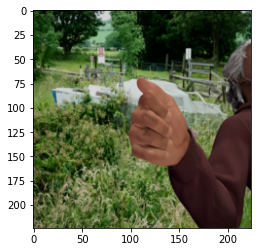

In [6]:
plt.imshow(X_train_orig[23])

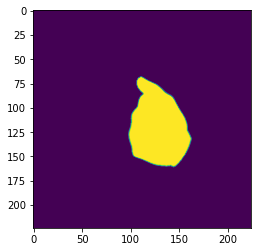

In [7]:
plt.imshow(X_train_segmented[23])

batch_size = 32
img_height = 224
img_width = 224

trainOriginalDirPath = "../images/train/color"

train_ds = tf.keras.utils.image_dataset_from_directory(trainOriginalDirPath,
                                                       labels=None,
                                                       shuffle=False,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size)
trainSegmentedDirPath = "../images/train/segmented"

train_mask_ds = tf.keras.utils.image_dataset_from_directory(trainSegmentedDirPath,
                                                       labels=None,
                                                       shuffle=False,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
train_mask_ds = train_mask_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
X_train_orig = X_train_orig/255.0
X_train_segmented = X_train_segmented/255.0

In [9]:
autoencoder = keras.models.Sequential()

autoencoder.add( keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(224,224,3)))
autoencoder.add( keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
autoencoder.add( keras.layers.Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
autoencoder.add( keras.layers.Conv2DTranspose(8, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
autoencoder.add( keras.layers.Conv2DTranspose(16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
autoencoder.add( keras.layers.Conv2DTranspose(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
autoencoder.add( keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same'))
          
autoencoder.summary()

2022-05-27 23:20:29.628996: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 16)      4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 8)       1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 220, 220, 8)      584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 222, 222, 16)     1168      
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 224, 224, 32)     4

In [10]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=1e-3))

In [11]:
history = autoencoder.fit(X_train_orig, X_train_segmented, epochs=20, batch_size=32, shuffle=False)

Epoch 1/20
10/10 [==============================] - 27s 2s/step - loss: 0.4574
Epoch 2/20
10/10 [==============================] - 30s 3s/step - loss: 0.3545
Epoch 3/20
10/10 [==============================] - 26s 3s/step - loss: 0.2501
Epoch 4/20
10/10 [==============================] - 33s 3s/step - loss: 0.1758
Epoch 5/20
10/10 [==============================] - 31s 3s/step - loss: 0.1564
Epoch 6/20
10/10 [==============================] - 31s 3s/step - loss: 0.1454
Epoch 7/20
10/10 [==============================] - 29s 3s/step - loss: 0.1341
Epoch 8/20
10/10 [==============================] - 29s 3s/step - loss: 0.1290
Epoch 9/20
10/10 [==============================] - 28s 3s/step - loss: 0.1202
Epoch 10/20
10/10 [==============================] - 26s 3s/step - loss: 0.1131
Epoch 11/20
10/10 [==============================] - 28s 3s/step - loss: 0.1047
Epoch 12/20
10/10 [==============================] - 27s 3s/step - loss: 0.1011
Epoch 13/20
10/10 [==============================

(224, 224, 3)


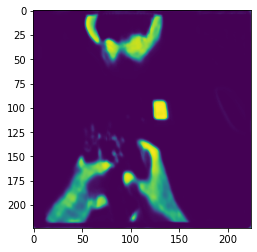

In [37]:
img_test = np.array(Image.open('/Users/andrew/Downloads/rgb/12.jpg').resize((224, 224), resample=Image.BILINEAR)) / 255.0
print(img_test.shape)

plt.imshow(img_test)
predicted = autoencoder.predict(img_test.reshape(1,224,224,3))

plt.imshow(predicted[0])